<a href="https://colab.research.google.com/github/YENSTDi/Crawler/blob/master/1091_%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8_%E6%87%89%E7%94%A8%E7%BF%92%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 先執行這行 引入所需套件

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 監督式學習

## 分類

In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
# 載入檔案 https://www.kaggle.com/c/titanic/data?select=train.csv
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 丟棄不要欄位
drop_col = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df = df.drop(drop_col, axis=1)

In [ ]:
# 檔案資訊
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
# 資料清理
df = df.dropna(axis=0, how='any')

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

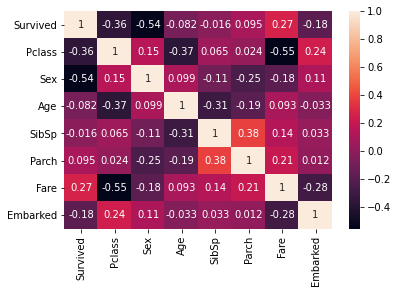

In [ ]:
# 相關係數
corr = df.corr()
# corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, annot=True)

In [ ]:
# 選擇需要欄位
X = df.iloc[:,1:]
y = df.iloc[:,:1]

# 切出訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 2.94851432
Iteration 2, loss = 1.90326855
Iteration 3, loss = 1.18741887
Iteration 4, loss = 0.91393306
Iteration 5, loss = 0.91206600
Iteration 6, loss = 0.98630470
Iteration 7, loss = 1.01121534
Iteration 8, loss = 0.91661454
Iteration 9, loss = 0.80813569
Iteration 10, loss = 0.73606055
Iteration 11, loss = 0.70863883
Iteration 12, loss = 0.70325966
Iteration 13, loss = 0.68199890
Iteration 14, loss = 0.64584418
Iteration 15, loss = 0.62654650
Iteration 16, loss = 0.62508070
Iteration 17, loss = 0.61541361
Iteration 18, loss = 0.59987019
Iteration 19, loss = 0.59089486
Iteration 20, loss = 0.58564069
Iteration 21, loss = 0.57862009
Iteration 22, loss = 0.57647649
Iteration 23, loss = 0.57461712
Iteration 24, loss = 0.56920432
Iteration 25, loss = 0.56645069
Iteration 26, loss = 0.56326318
Iteration 27, loss = 0.56091504
Iteration 28, loss = 0.55921326
Iteration 29, loss = 0.55505009
Iteration 30, loss = 0.55271822
Iteration 31, loss = 0.55109168
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


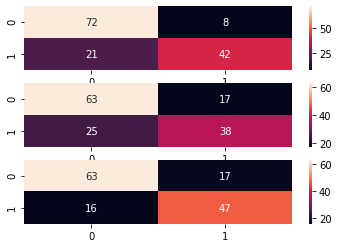

In [ ]:
# 載入模型
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

tr = tree.DecisionTreeClassifier(random_state=42)
tr.fit(X_train, y_train)

ann = MLPClassifier(random_state=42, verbose=True)
ann.fit(X_train, y_train)

# 預測
rf_predict = rf.predict(X_test)
tr_predict = tr.predict(X_test)
ann_predict = ann.predict(X_test)

# 模型效能指標
rf_acc = accuracy_score(y_test, rf_predict)
rf_f1 = f1_score(y_test, rf_predict)
tr_acc = accuracy_score(y_test, tr_predict)
tr_f1 = f1_score(y_test, tr_predict)
ann_acc = accuracy_score(y_test, ann_predict)
ann_f1 = f1_score(y_test, ann_predict)

# 混淆矩陣
rf_confusion = confusion_matrix(y_test, rf_predict)
tr_confusion = confusion_matrix(y_test, tr_predict)
ann_confusion = confusion_matrix(y_test, ann_predict)


print("-------RandomForest-------")
print("acc={}".format(rf_acc))
print("f1={}".format(rf_f1))

print("-------DecsionTree-------")
print("acc={}".format(tr_acc))
print("f1={}".format(tr_f1))

print("-------Ann-------")
print("acc={}".format(ann_acc))
print("f1={}".format(ann_f1))


print("confusion martix")
fig, ax = plt.subplots(nrows=3)
sns.heatmap(rf_confusion, annot=True, ax=ax[0])
sns.heatmap(tr_confusion, annot=True, ax=ax[1])
sns.heatmap(ann_confusion, annot=True, ax=ax[2])

## **分類練習題**
---
###初階-心力衰竭預測
https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

###進階-信用卡客戶欠費
https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

---

###目標：
1. 劃出資料相關係數圖
2. 建立可預測之模型
3. 計算出accuracy_score和f1_score
4. 劃出ROC曲線、混淆矩陣
5. (找出模型影響因子eli5)


## 回歸

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# 載入檔案
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# 資料清理
# 使用LabelEncoder將標籤轉為對應數值
lb = LabelEncoder()
lb.fit(df['sex'].drop_duplicates()) 
df['sex'] = lb.transform(df['sex'])

lb.fit(df['smoker'].drop_duplicates()) 
df['smoker'] = lb.transform(df['smoker'])

lb.fit(df['region'].drop_duplicates()) 
df['region'] = lb.transform(df['region'])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


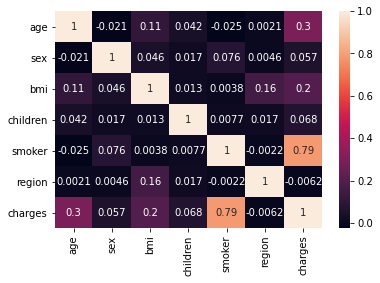

In [ ]:
# 相關係數
corr = df.corr()
sns.heatmap(corr, annot=True)

In [ ]:
# 選擇需要欄位
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 切分資料為 訓練8:測試2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 載入模型
ln = LinearRegression()
ln.fit(X_train, y_train)

# 預測
ln_predict = ln.predict(X_test)

# 模型效能指標
ln_mse = mean_squared_error(y_test, ln_predict, squared=False)
ln_r2 = r2_score(y_test, ln_predict)

print("ln_mse={}".format(ln_mse))
print("ln_r2={}".format(ln_r2))

ln_mse=5799.587091438356
ln_r2=0.7833463107364539


In [ ]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

rfr_predict = rfr.predict(X_test)
rfr_mse = mean_squared_error(y_test, rfr_predict, squared=False)
rfr_r2 = r2_score(y_test, rfr_predict)

print("rfr_mse={}".format(rfr_mse))
print("rfr_r2={}".format(rfr_r2))

rfr_mse=4594.30321576525
rfr_r2=0.8640399709835349


In [ ]:
ann = MLPRegressor(batch_size=10 ,learning_rate_init=1e-1 ,random_state=42)
ann.fit(X_train, y_train)

ann_predict = ann.predict(X_test)
ann_mse = mean_squared_error(y_test, ann_predict, squared=False)
ann_r2 = r2_score(y_test, ann_predict)

print("ann_mse={}".format(ann_mse))
print("ann_r2={}".format(ann_r2))

ann_mse=4603.795692990351
ann_r2=0.8634775654581138


## **回歸練習題**
---
###初階-車價預測 
https://www.kaggle.com/hellbuoy/car-price-prediction

###進階-共享自行車預測 
https://www.kaggle.com/c/bike-sharing-demand/data

---
###目標：
1. 建立回歸模型
2. 劃出相關係數圖
3. 使用RSE、R2評估模型
4. (找出模型影響因子eli5)

# 非監督式學習

## 關聯規則

In [ ]:
# 下載套件
!pip install efficient-apriori

In [ ]:
from efficient_apriori import apriori
import pandas as pd

In [ ]:
# 載入檔案
df = pd.read_csv('Market_Basket_Optimisation.csv', header= None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 將格式轉為list
transactions = []
for i in range(0, len(df)):
  transactions.append([str(j) for j in df.iloc[i,:] if str(j)!='nan'])

len(transactions)

7501

In [ ]:
# 使用關聯規則演算法
itemsets, rules = apriori(transactions, min_support=0.003, min_confidence=0.2)
list(rules)

[{almonds} -> {green tea},
 {almonds} -> {mineral water},
 {avocado} -> {mineral water},
 {cottage cheese} -> {green tea},
 {cottage cheese} -> {mineral water},
 {energy drink} -> {mineral water},
 {frozen smoothie} -> {mineral water},
 {green grapes} -> {mineral water},
 {green tea} -> {mineral water},
 {tomato juice} -> {green tea},
 {honey} -> {mineral water},
 {low fat yogurt} -> {mineral water},
 {olive oil} -> {mineral water},
 {salmon} -> {mineral water},
 {shrimp} -> {mineral water},
 {tomato juice} -> {mineral water},
 {vegetables mix} -> {mineral water},
 {whole weat flour} -> {mineral water},
 {yams} -> {mineral water},
 {burgers} -> {eggs},
 {meatballs} -> {eggs},
 {energy bar} -> {milk},
 {energy bar} -> {mineral water},
 {mineral water} -> {milk},
 {milk} -> {mineral water},
 {whole wheat rice} -> {milk},
 {whole wheat rice} -> {mineral water},
 {frozen vegetables} -> {spaghetti},
 {green tea} -> {spaghetti},
 {burgers} -> {mineral water},
 {cooking oil} -> {eggs},
 {cook

## **關聯規則練習題**

---

###雜貨數據集

https://www.kaggle.com/heeraldedhia/groceries-dataset

---
###目標：
1. 下載並使用關聯規則演算法
2. 整理同一位顧客、同一天的產品 為一筆資料
2. 查看各物品之間的關聯
3. 了解參數Support、Confidence

## 分群

In [12]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import adjusted_mutual_info_score

In [13]:
# 載入檔案
df = pd.read_csv('titanic_train.csv')

# 使用info查看資料架構
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# 資料清理
df = df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

df['Age'] = df['Age'].fillna(df['Age'].mean())
df = df.dropna(axis=0)

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# minmax = MinMaxScaler()
# df['Age'] = minmax.fit_transform(df['Age'].values.reshape(-1,1))
# df['Fare'] = minmax.fit_transform(df['Fare'].values.reshape(-1,1))

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

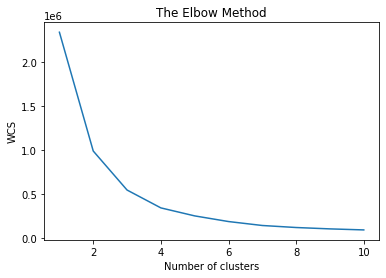

In [16]:
# 算出最適分群數
wcs = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters= i, random_state= 42)
  kmeans.fit(df_pca)
  wcs.append(kmeans.inertia_)

plt.plot(range(1, 11), wcs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCS')
plt.show()

In [17]:
# 將模型分群數調至2
kmeans = KMeans(n_clusters= 2, random_state= 42)

# 建立模型並預測
kms_predict = kmeans.fit_predict(df_pca)

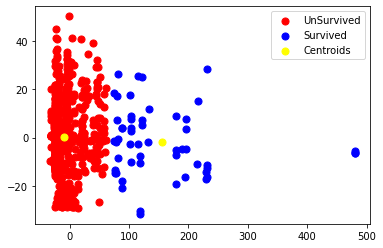

In [18]:
# 印出各群
plt.scatter(df_pca[kms_predict == 0, 0], df_pca[kms_predict == 0, 1], s = 50, c = 'red', label = 'UnSurvived')
plt.scatter(df_pca[kms_predict == 1, 0], df_pca[kms_predict == 1, 1], s = 50, c = 'blue', label = 'Survived')
# plt.scatter(df_pca[kms_predict == 2, 0], df_pca[kms_predict == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

# 印出群心
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

In [21]:
df['Survived'] = kms_predict
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,2,0
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,2,0
3,1,0,35.0,1,0,53.1000,2,0
4,3,1,35.0,0,0,8.0500,2,0


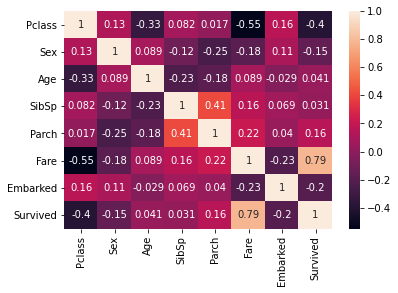

In [22]:
# 相關係數
corr = df.corr()
# corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, annot=True)

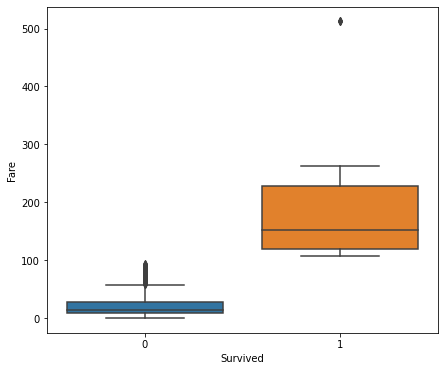

In [49]:
f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="Survived", y="Fare", data=df[['Fare', 'Survived']])

## **分群練習題**
---
###初階-心力衰竭預測
https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

###進階-信用卡客戶欠費
https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

---

###目標：
1. 把Y扔掉
2. 清理資料
4. 算出最適分群數
5. 建立可預測之模型
6. 視覺化呈現最後結果

# 深度學習

> ## mnist







In [ ]:
import tensorflow as tf

In [ ]:
# Mnist手寫數字資料下載讀取
mnist = tf.keras.datasets.mnist

# Mnist的load_data()會回傳已經先分割好的training data 和 testing data
# 並且將每個 pixel 的型態從 Int 轉成 floating 同時做normalize(這是很常見的preprocessing)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
r = mnist.load_data()
r[0][0].shape

(60000, 28, 28)

In [ ]:
print(len(x_train)) # training data 總共有60000張圖片
print(x_train[0].shape) # 每張圖片（拿第一張當樣本）大小為 28x28

60000
(28, 28)


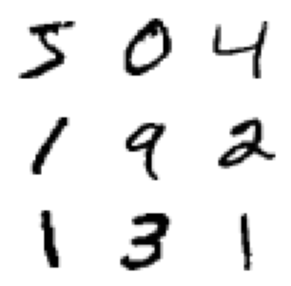

In [ ]:
# 顯示training data資料圖案
plt.figure(figsize=(5, 5))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.axis("off")

In [ ]:
print(len(x_test)) # test data 總共有10000張圖片
print(x_train[0].shape) # 每張圖片（拿第一張當樣本）大小為 28x28

10000
(28, 28)


In [ ]:
# 開始搭建model 此模型為神經網路
# 利用 Sequential 把每層 layer 疊起來

# input 大小為 28 x 28

# 最後的 Dense(10) 且 activation 用 softmax
# 代表最後 output 為 10 個 class （0~9）的機率

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# model每層定義好後需要經過compile
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# 將搭好的 model 去 fit 我們的 training data
history = model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2937 - accuracy: 0.9151
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1417 - accuracy: 0.9577
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1069 - accuracy: 0.9682
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0862 - accuracy: 0.9734
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0725 - accuracy: 0.9773


In [ ]:
# evalutate 在 testing data 上
model.evaluate(x_test, y_test, verbose = 2)

313/313 - 0s - loss: 0.0766 - accuracy: 0.9776


[0.07664821296930313, 0.9775999784469604]

In [ ]:
# 顯示整體模型layer
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


>## CIFAR10

In [ ]:
# CIFAR-10 數據集共有10個類別、60000張32x32彩色圖像。每個類別6000個圖像。有50000張訓練圖像和10000張測試圖像。
cifar10 = tf.keras.datasets.cifar10

# Mnist的load_data()會回傳已經先分割好的training data 和 testing data
# 並且將每個 pixel 的型態從 Int 轉成 floating 同時做normalize(這是很常見的preprocessing)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
r = cifar10.load_data()
r[1][0].shape

(10000, 32, 32, 3)

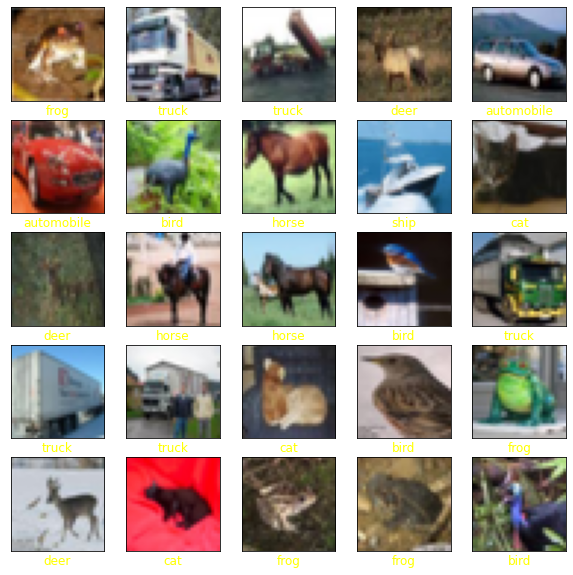

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]], fontsize=12, color='yellow')
plt.show()

In [ ]:
# 開始搭建model 此模型為卷積神經網路
# 利用 Sequential 把每層 layer 疊起來

# 代表最後 output 為 10 個 class 的機率

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# 顯示整體模型layer
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(
        x_train, y_train,
        epochs=10, 
        validation_data=(x_test, y_test)
      )

Epoch 1/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.4996 - accuracy: 0.4554 - val_loss: 1.1813 - val_accuracy: 0.5766
Epoch 2/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.1150 - accuracy: 0.6054 - val_loss: 1.0486 - val_accuracy: 0.6242
Epoch 3/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.9792 - accuracy: 0.6550 - val_loss: 0.9703 - val_accuracy: 0.6560
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8893 - accuracy: 0.6882 - val_loss: 0.9401 - val_accuracy: 0.6692
Epoch 5/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8179 - accuracy: 0.7133 - val_loss: 0.9436 - val_accuracy: 0.6777
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7633 - accuracy: 0.7323 - val_loss: 0.9038 - val_accuracy: 0.6878
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7171 - accuracy: 0.7471 - val_loss: 0.8656 -

313/313 - 4s - loss: 0.8971 - accuracy: 0.7018


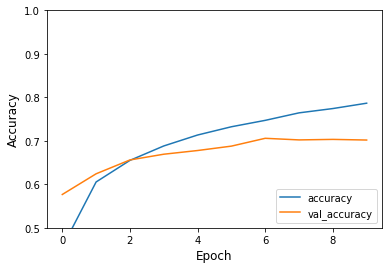

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

plt.tick_params(axis='x')
plt.tick_params(axis='y')

plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

In [ ]:
print('Test dataset accuracy:', test_acc)

Test dataset accuracy: 0.7017999887466431


# ---------------------以下還在施工---------------------